In [1]:
from DCGAN import Generator,Discriminator,DiscriminatorExp,GeneratorExp
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
noise = 100

In [3]:
gen = GeneratorExp(random_noise=noise).to('cuda')
disc = DiscriminatorExp().to('cuda')

In [4]:
gen.load_state_dict(torch.load("model weights/DCGen.pt"))
disc.load_state_dict(torch.load("model weights/DCDisc.pt"))

C:\Users\vishw\AppData\Local\Temp\ipykernel_37160\2052662698.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gen.load_state_dict(torch.load("model weights/DCGen.pt"))
C:

<All keys matched successfully>

In [5]:
batch_size = 32

z = torch.randn(batch_size,noise).to('cuda')
generated_celebs = gen(z)

In [6]:
generated_celebs_cpu = generated_celebs.cpu().detach().numpy()

(3, 64, 64)


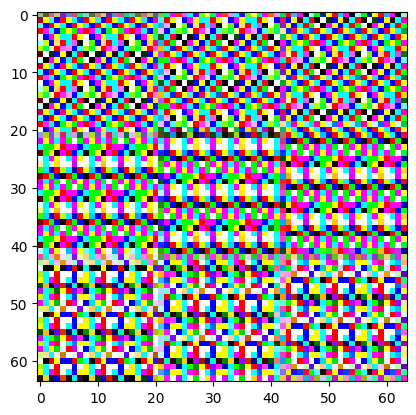

In [7]:
# This happened when I UPSAMPLED noise of generator to 8*8*1024 to 64*64*3

import matplotlib.pyplot as plt
import numpy as np

try:
    # Normalize the generated image from [-1, 1] to [0, 1]
    generated_imgs_cpu = (generated_celebs_cpu + 1) / 2.0
    
    # Reshape to (batch_size, height, width, channels) assuming RGB images
    generated_imgs_cpu = generated_imgs_cpu.reshape(-1, 64, 64, 3)

    print(generated_imgs_cpu[0].T.shape)
    
    # Display the image
    plt.imshow(generated_imgs_cpu[15])
    plt.show()

except Exception as e:
    print(e)

In [74]:
dcgen = Generator(random_noise=100).to('cuda')
dcdisc = Discriminator().to('cuda')

In [75]:
dcgen.load_state_dict(torch.load('./model weights/dc_gen_10ep.pt'))
dcdisc.load_state_dict(torch.load('./model weights/dc_disc_10ep.pt'))

C:\Users\vishw\AppData\Local\Temp\ipykernel_37160\1536757305.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dcgen.load_state_dict(torch.load('./model weights/dc_gen_10e

<All keys matched successfully>

In [76]:
batch_size = 32

z = torch.randn(batch_size,noise).to('cuda')
new_generated_celebs = dcgen(z)

In [77]:
new_generated_celebs = new_generated_celebs.cpu().detach().numpy()

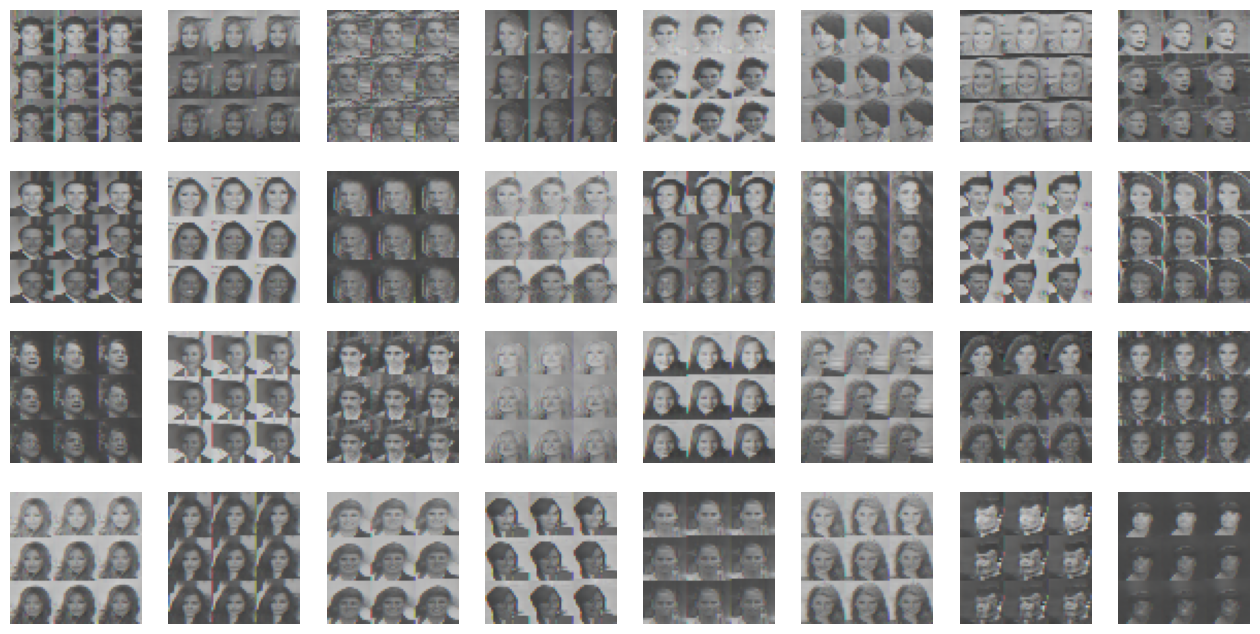

<Figure size 640x480 with 0 Axes>

In [80]:
import matplotlib.pyplot as plt

try:
    # Normalize the generated images from [-1, 1] to [0, 1]
    # generated_imgs_cpu = (new_generated_celebs + 1) / 2.0
    
    # Reshape to (batch_size, height, width, channels) assuming RGB images
    generated_imgs_cpu = generated_imgs_cpu.reshape(-1, 64, 64,3)
    
    # Set the number of images you want to display
    num_images = 32

    # Create a grid of 4x8 for 32 images
    fig, axs = plt.subplots(4, 8, figsize=(16, 8))

    # Plot each image
    for i in range(4):
        for j in range(8):
            index = i * 8 + j
            if index < num_images:
                axs[i, j].imshow(generated_imgs_cpu[index],cmap='gray')
                axs[i, j].axis('off')  # Turn off axis for a cleaner look

    # Display the grid of images
    plt.show()
    plt.savefig('./output/out_color_test.png')
except Exception as e:
    print(e)
